In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [4]:
data = pd.read_csv('C:/Users/sys/Downloads/Logistic_Regression_Binary_Classsification_Churn_Data.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


In [7]:
data.head(30)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,8,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,22,Yes,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,10,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,28,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,62,Yes,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [9]:
data.isnull()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False


In [35]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce').fillna(1415).astype(int)
data['Churn']=pd.get_dummies(data['Churn'])

In [36]:
x=data.iloc[:,6:8].values
y=data.iloc[:,8].values

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=12)

In [39]:
logregres = LogisticRegression()

In [40]:
logregres.fit(x_train,y_train)

C:\Users\sys\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
predictions = logregres.predict(x_test)

In [42]:
predictions

array([1, 0, 1, ..., 0, 1, 0], dtype=uint8)

In [43]:
confusion_matrix(y_test,predictions)

array([[155, 211],
       [ 97, 946]], dtype=int64)

In [44]:
logregres.score(x_test, y_test)

0.7814052519517388

In [45]:
precision_score(y_test, predictions)

0.8176318063958513

In [46]:
recall_score(y_test, predictions)

0.9069990412272292

In [47]:
f1_score(y_test, predictions)

0.8600000000000001

In [50]:
y_pred_prob = logregres.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

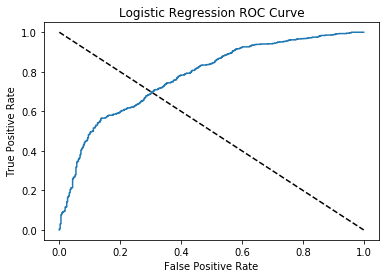

In [51]:
plt.plot([0, 1], [1, 0], 'k--')
plt.plot(fpr, tpr, label='Logitic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()